In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
from tqdm import tqdm
import gymnasium as gym
from matplotlib import pyplot as plt

243


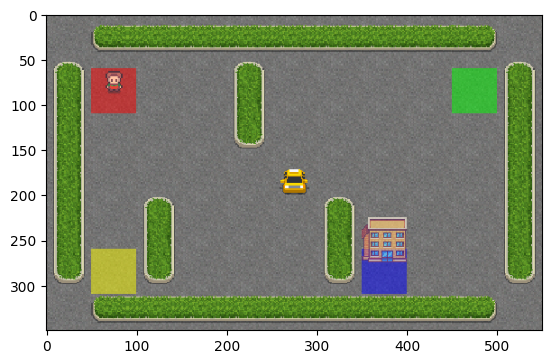

In [3]:
env = gym.make('Taxi-v3',render_mode='rgb_array')
# env.reset()
print(env.reset()[0])
plt.imshow(env.render())

#SMDP

In [58]:
alpha = 0.2
gamma = 0.9
Q_val = np.zeros((500,10))
# 4 options
# 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
Q_R = np.zeros((5,5,4))
Q_Y = np.zeros((5,5,4))
Q_B = np.zeros((5,5,4))
Q_G = np.zeros((5,5,4))

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]
def epislon_greedy_option(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3])
  else:
    action = np.argmax(Q_values[state[0],state[1]])
  return action

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7,8,9])
  else:
    action = np.argmax(Q_values[state,:])
  return action

def O_R(alpha,gamma,start):
  state = start
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [0,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_R , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_Y(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [4,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_Y , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_B(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [4,3]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_B , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,3]:
      #   reward = 0
      # print(state,next_state,action)
      Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_G(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [0,4]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_G , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,4]:
      #   reward = 0
      # print(state,next_state,action)
      Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R


In [59]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# Iterate over 1000 episodes
for i in tqdm(range(10000)):
    state = env.reset()[0]
    done = False
    # acc_reward = 0
    # While episode is not over
    while not done:
        # Choose action
        action = epislon_greedy(Q_val, state, epsilon=0.5)
        # print(state)
        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
            state = next_state

        # Checking if action chosen is an option
        if action == 6:
            next_state, reward = O_R(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 7:
            next_state, reward = O_Y(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 8:
            next_state, reward = O_B(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 9:
            next_state, reward = O_G(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        # acc_reward += reward
    # print(acc_reward)

100%|██████████| 10000/10000 [00:38<00:00, 261.71it/s]


In [22]:
val_fn = np.max(Q_B,axis = 2)

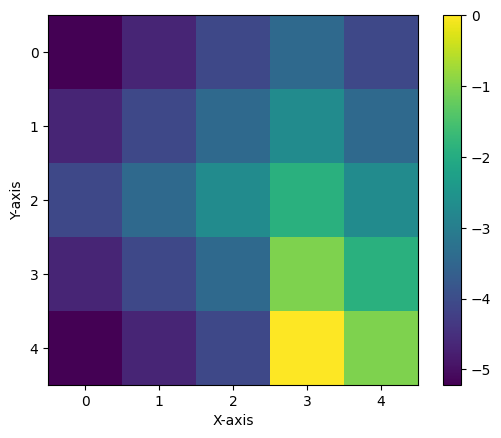

In [23]:
plt.imshow(val_fn, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

##Q Plot

In [24]:

# Actions
SOUTH = 0
NORTH = 1
EAST = 2
WEST = 3
PICKUP = 4
DROPOFF = 5

# Options
GOTOR = 6
GOTOG = 7
GOTOY = 8
GOTOB = 9

# Destination and Passenger locations
RED = 0
GREEN = 1
YELLOW = 2
BLUE = 3

INTAXI = 4

# Plot the Q map of the taxi environment
import matplotlib.patches as patches
def plot_Q(Q, obstructions, message = "Q plot"):

    # Obstructions are the cells that are not allowed to be visited
    obstructions = []

    num_rows = 5
    num_cols = 5

    plt.figure(figsize=(4,3))
    plt.title(message, y=1.10)
    plt.pcolor(Q.max(-1).reshape(num_rows, num_cols))
    plt.colorbar()
    def x_direct(a):
        if a in [NORTH, SOUTH]:
            return 0
        return 1 if a == EAST else -1
    def y_direct(a):
        if a == 4:
            return 1
        if a == 5:
            return -1
        if a in [EAST, WEST]:
            return 0
        return 1 if a == NORTH else -1
    policy = Q.argmax(-1)
    policyx = np.vectorize(x_direct)(policy)
    policyy = np.vectorize(y_direct)(policy)
    idx = np.indices(policy.shape)
    plt.quiver(idx[1].ravel()+0.5, idx[0].ravel()+0.5, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')

    # Reverse the y-axis to have the origin in the top left
    plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

    # White out the obstacles
    for obs in obstructions:
        plt.gca().add_patch(patches.Rectangle((obs[1], obs[0]), 1, 1, color='white'))

    # Add axis numbers next to cells
    for x in range(num_cols + 1):
        if x < num_cols:
            plt.text(x + 0.5, -0.25, str(x), ha='center', va='center')
    for y in range(num_rows + 1):
        if y < num_rows:
            plt.text(-0.5, y + 0.5, str(y), ha='center', va='center')

    # Remove the default x and y ticks
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.show()

def plot_visited_states(visited_states, obstructions, message = "State Updation Frequency"):
    plt.figure(figsize=(8,3))
    plt.imshow(visited_states)

    for obs in obstructions:
        plt.gca().add_patch(plt.Rectangle((obs[1]-0.5, obs[0]-0.5), 1, 1, fc = 'white'))

    plt.colorbar()
    plt.title(message)
    plt.show()

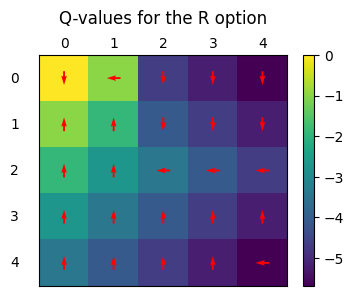

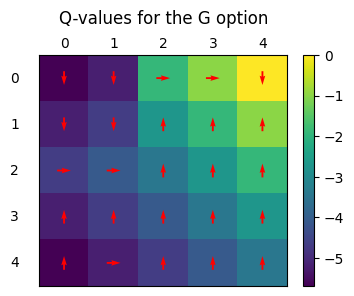

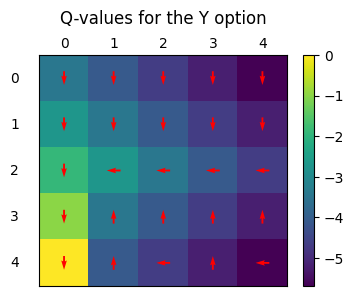

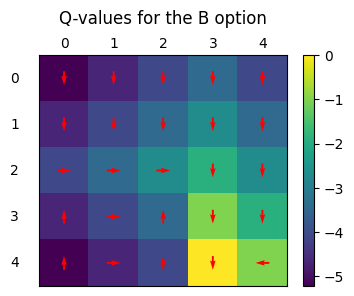

In [25]:
# Make the 5X5 Q values for the taxi environment

plot_Q(Q_R, [], "Q-values for the R option")
plot_Q(Q_G, [], "Q-values for the G option")
plot_Q(Q_Y, [], "Q-values for the Y option")
plot_Q(Q_B, [], "Q-values for the B option")

In [178]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate\
# Iterate over 1000 episodes
reward_arr = []
for j in range(5):
    temp = []
    Q_val = np.zeros((500,10))
    # 4 options
    # 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
    Q_R = np.zeros((5,5,4))
    Q_Y = np.zeros((5,5,4))
    Q_B = np.zeros((5,5,4))
    Q_G = np.zeros((5,5,4))
    for i in tqdm(range(10000)):
        state = env.reset()[0]
        done = False
        acc_reward = 0
        # While episode is not over
        while not done:
            # Choose action
            action = epislon_greedy(Q_val, state, epsilon=0.5)
            # print(state)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
                state = next_state

            # Checking if action chosen is an option
            if action == 6:
                next_state, reward = O_R(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 7:
                next_state, reward = O_Y(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 8:
                next_state, reward = O_B(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 9:
                next_state, reward = O_G(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            acc_reward += reward
        temp.append(acc_reward)
    reward_arr.append(temp)

100%|██████████| 10000/10000 [00:24<00:00, 412.87it/s]


(5, 10000)


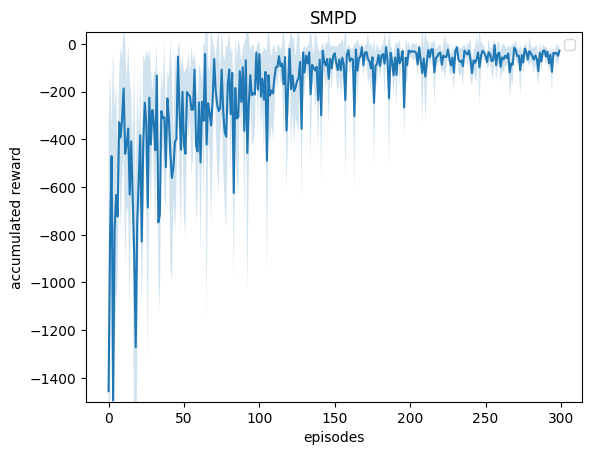

In [181]:
reward_arr = np.array(reward_arr)
print(reward_arr.shape)
std = np.std(reward_arr,axis=0)[:300]
mean = np.mean(reward_arr,axis=0)[:300]
plt.ylim((-1500,50))
plt.plot(np.arange(len(mean)),mean)
plt.fill_between(np.arange(len(mean)),mean+std,mean-std,alpha = 0.2)
plt.title("SMPD")
plt.xlabel("episodes")
plt.ylabel("accumulated reward")
plt.legend()

In [182]:
np.save("SMDP.npy",reward_arr)

#Intra Option Learning

In [77]:
alpha = 0.2
gamma = 0.9
Q_val = np.zeros((500,10))
# 4 options
# 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
Q_R = np.zeros((5,5,4))
Q_Y = np.zeros((5,5,4))
Q_B = np.zeros((5,5,4))
Q_G = np.zeros((5,5,4))

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]
def epislon_greedy_option(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3])
  else:
    action = np.argmax(Q_values[state[0],state[1]])
  return action

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7,8,9])
  else:
    action = np.argmax(Q_values[state,:])
  return action

def O_R(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [0,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_R , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_Y(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [4,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_Y , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_B(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [4,3]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_B , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,3]:
      #   reward = 0
      # print(state,next_state,action)
      Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_G(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [0,4]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_G , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,4]:
      #   reward = 0
      # print(state,next_state,action)
      Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R


In [78]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# Iterate over 1000 episodes
reward_arr = []
for i in tqdm(range(5000)):
    state = env.reset()[0]
    done = False
    acc_reward = 0
    # While episode is not over
    while not done:
        # Choose action
        reward = 0
        action = epislon_greedy(Q_val, state, epsilon=0.5)
        # print(state)
        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
            state = next_state

        # Checking if action chosen is an option
        if action == 6:
            next_state, reward = O_R(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 7:
            next_state, reward = O_Y(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 8:
            next_state, reward = O_B(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 9:
            next_state, reward = O_G(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        acc_reward += reward
    reward_arr.append(acc_reward)

100%|██████████| 5000/5000 [00:51<00:00, 97.91it/s] 


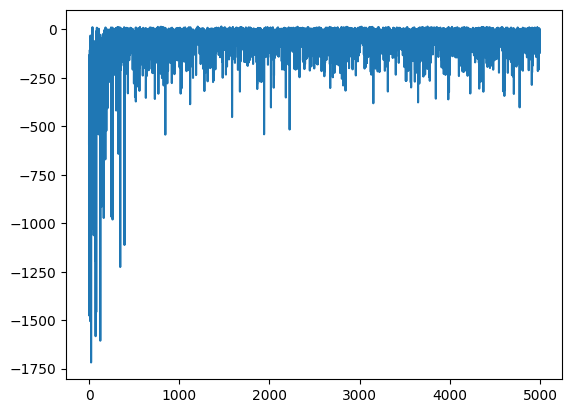

In [28]:
plt.plot(np.arange(len(reward_arr)),reward_arr)

In [29]:
val_fn = np.max(Q_G,axis = 2)

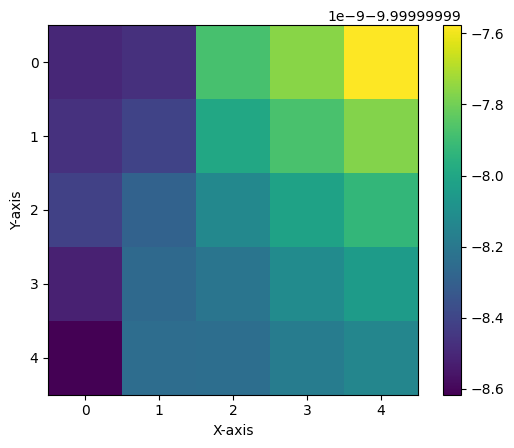

In [30]:
plt.imshow(val_fn, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

##Q Plot

In [31]:

# Actions
SOUTH = 0
NORTH = 1
EAST = 2
WEST = 3
PICKUP = 4
DROPOFF = 5

# Options
GOTOR = 6
GOTOG = 7
GOTOY = 8
GOTOB = 9

# Destination and Passenger locations
RED = 0
GREEN = 1
YELLOW = 2
BLUE = 3

INTAXI = 4

# Plot the Q map of the taxi environment
import matplotlib.patches as patches
def plot_Q(Q, obstructions, message = "Q plot"):

    # Obstructions are the cells that are not allowed to be visited
    obstructions = []

    num_rows = 5
    num_cols = 5

    plt.figure(figsize=(4,3))
    plt.title(message, y=1.10)
    plt.pcolor(Q.max(-1).reshape(num_rows, num_cols))
    plt.colorbar()
    def x_direct(a):
        if a in [NORTH, SOUTH]:
            return 0
        return 1 if a == EAST else -1
    def y_direct(a):
        if a == 4:
            return 1
        if a == 5:
            return -1
        if a in [EAST, WEST]:
            return 0
        return 1 if a == NORTH else -1
    policy = Q.argmax(-1)
    policyx = np.vectorize(x_direct)(policy)
    policyy = np.vectorize(y_direct)(policy)
    idx = np.indices(policy.shape)
    plt.quiver(idx[1].ravel()+0.5, idx[0].ravel()+0.5, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')

    # Reverse the y-axis to have the origin in the top left
    plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

    # White out the obstacles
    for obs in obstructions:
        plt.gca().add_patch(patches.Rectangle((obs[1], obs[0]), 1, 1, color='white'))

    # Add axis numbers next to cells
    for x in range(num_cols + 1):
        if x < num_cols:
            plt.text(x + 0.5, -0.25, str(x), ha='center', va='center')
    for y in range(num_rows + 1):
        if y < num_rows:
            plt.text(-0.5, y + 0.5, str(y), ha='center', va='center')

    # Remove the default x and y ticks
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.show()

def plot_visited_states(visited_states, obstructions, message = "State Updation Frequency"):
    plt.figure(figsize=(8,3))
    plt.imshow(visited_states)

    for obs in obstructions:
        plt.gca().add_patch(plt.Rectangle((obs[1]-0.5, obs[0]-0.5), 1, 1, fc = 'white'))

    plt.colorbar()
    plt.title(message)
    plt.show()

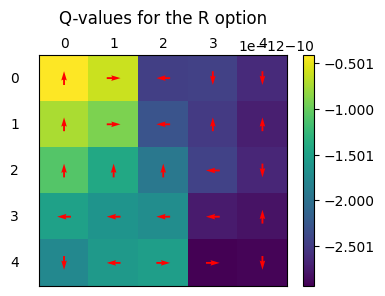

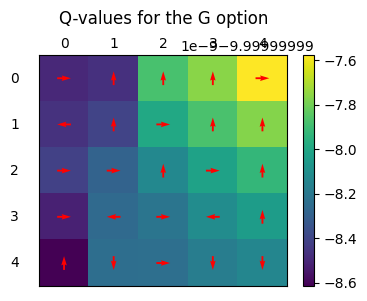

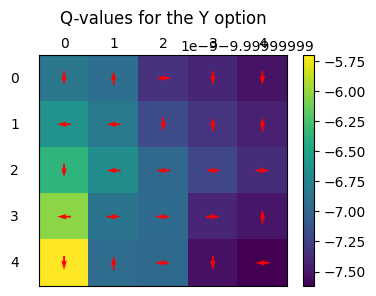

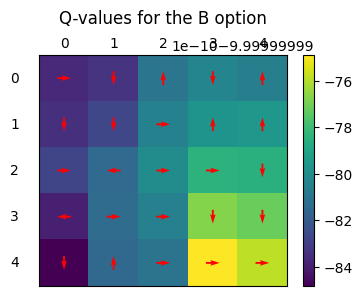

In [32]:
# Make the 5X5 Q values for the taxi environment

plot_Q(Q_R, [], "Q-values for the R option")
plot_Q(Q_G, [], "Q-values for the G option")
plot_Q(Q_Y, [], "Q-values for the Y option")
plot_Q(Q_B, [], "Q-values for the B option")

In [188]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# Iterate over 1000 episodes
reward_arr = []
for j in range(5):
    temp = []
    Q_val = np.zeros((500,10))
    # 4 options
    # 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
    Q_R = np.zeros((5,5,4))
    Q_Y = np.zeros((5,5,4))
    Q_B = np.zeros((5,5,4))
    Q_G = np.zeros((5,5,4))
    for i in tqdm(range(5000)):
        state = env.reset()[0]
        done = False
        acc_reward = 0
        # While episode is not over
        while not done:
            # Choose action
            reward = 0
            action = epislon_greedy(Q_val, state, epsilon=0.5)
            # print(state)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
                state = next_state

            # Checking if action chosen is an option
            if action == 6:
                next_state, reward = O_R(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 7:
                next_state, reward = O_Y(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 8:
                next_state, reward = O_B(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 9:
                next_state, reward = O_G(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            acc_reward += reward
        temp.append(acc_reward)
    reward_arr.append(temp)

100%|██████████| 5000/5000 [00:56<00:00, 89.15it/s] 


(5, 5000)


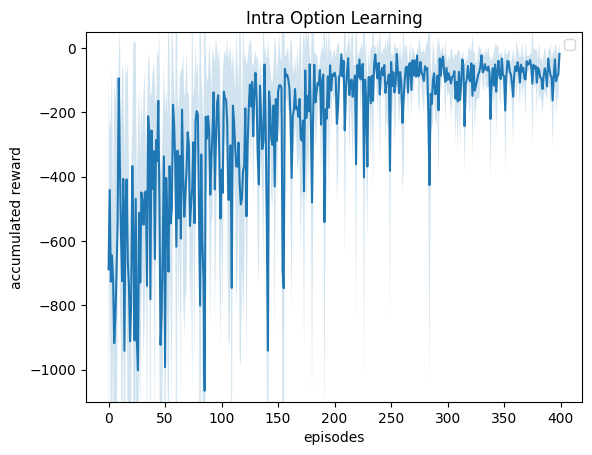

In [197]:
reward_arr = np.array(reward_arr)
print(reward_arr.shape)
std = np.std(reward_arr,axis=0)[:400]
mean = np.mean(reward_arr,axis=0)[:400]
plt.ylim((-1100,50))
plt.plot(np.arange(len(mean)),mean)
plt.fill_between(np.arange(len(mean)),mean+std,mean-std,alpha = 0.2)
plt.title("Intra Option Learning")
plt.xlabel("episodes")
plt.ylabel("accumulated reward")
plt.legend()

In [198]:
np.save("Intra_option.npy",reward_arr)

In [ ]:
plt.figure(figsize = (15,80))
plt.imshow(Q_val, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#Alternative Mutually exclusive options

##SMDP

In [199]:
alpha = 0.2
gamma = 0.9
Q_val = np.zeros((500,8))

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]
# def epislon_greedy_option(Q_values , state , epsilon = 0.2):
#   val = np.random.rand()
#   if val < epsilon:
#     action = np.random.choice([0,1])
#   else:
#     action = np.argmax(Q_values[state[0],state[1]])
#   return action

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7])
  else:
    action = np.argmax(Q_values[state,:])
  return action
def O_UP(alpha,gamma,start):
  opt_done = False
  count = 0
  R = 0
  state = obv_state(start)[:2]
  observation = start
  while not opt_done:
    if state[0]//3 <= 0:
      opt_done = True
      break
    else:
      action = 1
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      R += reward*(gamma**count)
      count+=1
      state = next_state
  return observation, R
def O_DOWN(alpha,gamma,start):
  opt_done = False
  count = 0
  R = 0
  state = obv_state(start)[:2]
  observation = start
  while not opt_done:
    if state[0]//3 > 0:
      opt_done = True
      break
    else:
      action = 0
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,0]:
      #   reward = 0
      # print(state,next_state,action)
      R += reward*(gamma**count)
      count+=1
      state = next_state
  return observation, R

In [200]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# q_values_SMDP = np.zeros((500, 10))
# Iterate over 1000 episodes
reward_arr = []
for i in tqdm(range(1000)):
    state = env.reset()[0]
    done = False
    acc_reward = 0
    # While episode is not over
    while not done:
        reward = 0
        # Choose action
        action = epislon_greedy(Q_val, state, epsilon=0.5)
        # print(state)
        # Checking if primitive action
        if action < 6:
            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done, _, _ = env.step(action)
            Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
            state = next_state

        # Checking if action chosen is an option
        if action == 6:
            next_state, reward = O_DOWN(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        if action == 7:
            next_state, reward = O_UP(alpha, gamma, state)
            # Complete SMDP Q-Learning Update for the option
            Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
            state = next_state
        acc_reward += reward
    reward_arr.append(acc_reward)


100%|██████████| 1000/1000 [01:16<00:00, 13.03it/s]


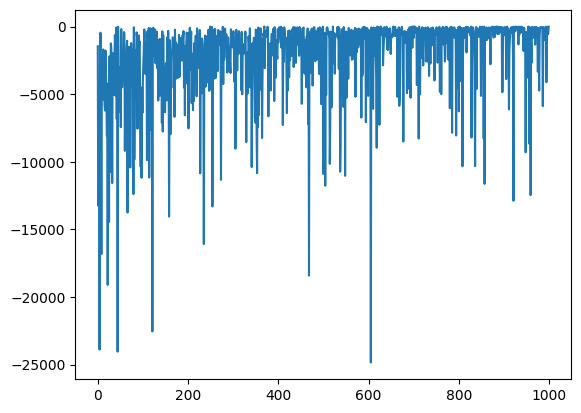

In [201]:
plt.plot(np.arange(len(reward_arr)),reward_arr)

In [203]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# Iterate over 1000 episodes
reward_arr = []
for j in range(5):
  temp = []
  Q_val = np.zeros((500,10))
  for i in tqdm(range(1000)):
      state = env.reset()[0]
      done = False
      acc_reward = 0
      # While episode is not over
      while not done:
          reward = 0
          # Choose action
          action = epislon_greedy(Q_val, state, epsilon=0.5)
          # print(state)
          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair
              next_state, reward, done, _, _ = env.step(action)
              Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
              state = next_state

          # Checking if action chosen is an option
          if action == 6:
              next_state, reward = O_DOWN(alpha, gamma, state)
              # Complete SMDP Q-Learning Update for the option
              Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
              state = next_state
          if action == 7:
              next_state, reward = O_UP(alpha, gamma, state)
              # Complete SMDP Q-Learning Update for the option
              Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
              state = next_state
          acc_reward += reward
      temp.append(acc_reward)
  reward_arr.append(temp)

100%|██████████| 1000/1000 [01:27<00:00, 11.46it/s]


(5, 1000)


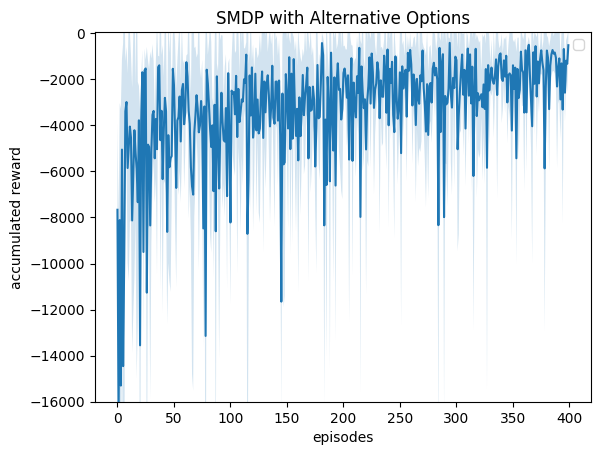

In [210]:
reward_arr = np.array(reward_arr)
print(reward_arr.shape)
std = np.std(reward_arr,axis=0)[:400]
mean = np.mean(reward_arr,axis=0)[:400]
plt.ylim((-16000,50))
plt.plot(np.arange(len(mean)),mean)
plt.fill_between(np.arange(len(mean)),mean+std,mean-std,alpha = 0.2)
plt.title("SMDP with Alternative Options")
plt.xlabel("episodes")
plt.ylabel("accumulated reward")
plt.legend()

In [211]:
np.save("SMDP_alternative_option.npy",reward_arr)

##Intra Option Learning

In [212]:
alpha = 0.2
gamma = 0.9
Q_val = np.zeros((500,8))

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7])
  else:
    action = np.argmax(Q_values[state,:])
  return action
def O_UP(alpha,gamma,start):
  opt_done = False
  count = 0
  R = 0
  state = obv_state(start)[:2]
  previous_state = observation = start
  while not opt_done:
    if state[0]//3 <= 0:
      opt_done = True
      break
    else:
      action = 1
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      Q_val[previous_state,action] += alpha*(reward + gamma*np.max(Q_val[observation]) - Q_val[previous_state,action])
      R += reward*(gamma**count)
      count+=1
      state = next_state
  return observation, R
def O_DOWN(alpha,gamma,start):
  opt_done = False
  count = 0
  R = 0
  state = obv_state(start)[:2]
  observation = start
  previous_state = observation = start
  while not opt_done:
    if state[0]//3 > 0:
      opt_done = True
      break
    else:
      action = 0
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      Q_val[previous_state,action] += alpha*(reward + gamma*np.max(Q_val[observation]) - Q_val[previous_state,action])
      R += reward*(gamma**count)
      count+=1
      state = next_state
  return observation, R

In [213]:
# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # Learning rate
# Iterate over 1000 episodes
reward_arr = []
for j in range(5):
  temp = []
  Q_val = np.zeros((500,10))
  for i in tqdm(range(1000)):
      state = env.reset()[0]
      done = False
      acc_reward = 0
      # While episode is not over
      while not done:
          reward = 0
          # Choose action
          action = epislon_greedy(Q_val, state, epsilon=0.5)
          # print(state)
          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair
              next_state, reward, done, _, _ = env.step(action)
              Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
              state = next_state

          # Checking if action chosen is an option
          if action == 6:
              next_state, reward = O_DOWN(alpha, gamma, state)
              # Complete SMDP Q-Learning Update for the option
              Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
              state = next_state
          if action == 7:
              next_state, reward = O_UP(alpha, gamma, state)
              # Complete SMDP Q-Learning Update for the option
              Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
              state = next_state
          acc_reward += reward
      temp.append(acc_reward)
  reward_arr.append(temp)

100%|██████████| 1000/1000 [00:58<00:00, 17.09it/s]


(5, 1000)


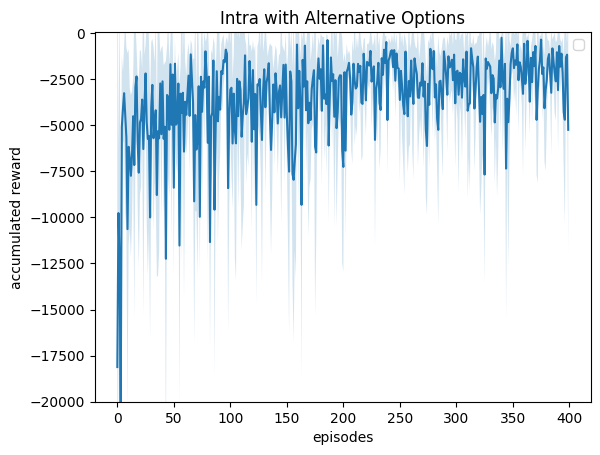

In [216]:
reward_arr = np.array(reward_arr)
print(reward_arr.shape)
std = np.std(reward_arr,axis=0)[:400]
mean = np.mean(reward_arr,axis=0)[:400]
plt.ylim((-20000,50))
plt.plot(np.arange(len(mean)),mean)
plt.fill_between(np.arange(len(mean)),mean+std,mean-std,alpha = 0.2)
plt.title("Intra with Alternative Options")
plt.xlabel("episodes")
plt.ylabel("accumulated reward")
plt.legend()

In [217]:
np.save("Intra_alternative_option.npy",reward_arr)

#Hyper Parameter Tuning

##SMDP

In [53]:
gamma = 0.9

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]
def epislon_greedy_option(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3])
  else:
    action = np.argmax(Q_values[state[0],state[1]])
  return action

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7,8,9])
  else:
    action = np.argmax(Q_values[state,:])
  return action

def O_R(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [0,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_R , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_Y(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [4,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_Y , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_B(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [4,3]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_B , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,3]:
      #   reward = 0
      # print(state,next_state,action)
      Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_G(alpha,gamma,start):
  state = obv_state(start)[:2]
  opt_done = False
  count = 0
  R = 0
  observation = start
  while not opt_done:
    if state == [0,4]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_G , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,4]:
      #   reward = 0
      # print(state,next_state,action)
      Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R


In [54]:
# Add parameters you might need here
gamma = 0.9
alpha_arr = [0.2,0.3,0.4]
epsilon_arr = [0.1,0.15,0.2]
j = 0
reward_arr = []
# Iterate over 1000 episodes for different parameters
for inde,epsilon in enumerate(epsilon_arr):
  for inda,alpha in enumerate(alpha_arr):
    Q_val = np.zeros((500,10))
    # 4 options
    # 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
    Q_R = np.zeros((5,5,4))
    Q_Y = np.zeros((5,5,4))
    Q_B = np.zeros((5,5,4))
    Q_G = np.zeros((5,5,4))
    j+=1
    print("iteration :- ",j)
    temp=[]
    for i in tqdm(range(1000)):
        state = env.reset()[0]
        done = False
        acc_reward = 0
        # While episode is not over
        while not done:
            # Choose action
            action = epislon_greedy(Q_val, state, epsilon=epsilon)
            # print(state)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
                state = next_state

            # Checking if action chosen is an option
            if action == 6:
                next_state, reward = O_R(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 7:
                next_state, reward = O_Y(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 8:
                next_state, reward = O_B(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 9:
                next_state, reward = O_G(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            acc_reward += reward
        # print(acc_reward)
        temp.append(acc_reward)
    reward_arr.append(temp)

iteration :-  1


100%|██████████| 1000/1000 [00:04<00:00, 237.16it/s]


iteration :-  2


100%|██████████| 1000/1000 [00:03<00:00, 306.32it/s]


iteration :-  3


100%|██████████| 1000/1000 [00:03<00:00, 328.45it/s]


iteration :-  4


100%|██████████| 1000/1000 [00:07<00:00, 130.38it/s]


iteration :-  5


100%|██████████| 1000/1000 [00:05<00:00, 170.10it/s]


iteration :-  6


100%|██████████| 1000/1000 [00:04<00:00, 218.73it/s]


iteration :-  7


100%|██████████| 1000/1000 [00:05<00:00, 182.35it/s]


iteration :-  8


100%|██████████| 1000/1000 [00:03<00:00, 263.51it/s]


iteration :-  9


100%|██████████| 1000/1000 [00:02<00:00, 369.28it/s]


In [55]:
# np.save("HP_Tuning.npy",reward_arr)

In [57]:
reward_arr = np.array(reward_arr)
print(np.sum(reward_arr,axis = 1))

[-30864.34084307 -29313.17970094 -19637.26879762 -31208.25384761
 -25592.58954959 -19427.20763618 -35895.31910559 -23375.52318883
 -21622.10535296]


##Intra Option Learning

In [47]:
alpha = 0.2
gamma = 0.9
Q_val = np.zeros((500,10))
# 4 options
# 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
Q_R = np.zeros((5,5,4))
Q_Y = np.zeros((5,5,4))
Q_B = np.zeros((5,5,4))
Q_G = np.zeros((5,5,4))

def obv_state(observation):
  return [observation//100,(observation//20)%5,(observation//4)%4,(observation)%4]
def epislon_greedy_option(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3])
  else:
    action = np.argmax(Q_values[state[0],state[1]])
  return action

def epislon_greedy(Q_values , state , epsilon = 0.2):
  val = np.random.rand()
  if val < epsilon:
    action = np.random.choice([0,1,2,3,4,5,6,7,8,9])
  else:
    action = np.argmax(Q_values[state,:])
  return action

def O_R(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [0,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_R , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_Y(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [4,0]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_Y , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,0]:
      #   reward = 0
      # print(state,next_state,action)
      Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_B(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [4,3]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_B , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [4,3]:
      #   reward = 0
      # print(state,next_state,action)
      Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_G[state[0],state[1]])==action:
        Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R

def O_G(alpha,gamma,start):
  state = obv_state(start)[:2]
  prev_state = start
  opt_done = False
  count = 0
  R = 0
  observation = 0
  while not opt_done:
    if state == [0,4]:
      opt_done = True
      break
    else:
      action = epislon_greedy_option(Q_G , epsilon = 0.2 , state = state)
      observation,reward,done,info,_ = env.step(action)
      next_state = obv_state(observation)[:2]
      # if next_state == [0,4]:
      #   reward = 0
      # print(state,next_state,action)
      Q_G[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_G[next_state[0],next_state[1]]) - Q_G[state[0],state[1],action])
      if np.argmax(Q_R[state[0],state[1]])==action:
        Q_R[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_R[next_state[0],next_state[1]]) - Q_R[state[0],state[1],action])
      if np.argmax(Q_B[state[0],state[1]])==action:
        Q_B[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_B[next_state[0],next_state[1]]) - Q_B[state[0],state[1],action])
      if np.argmax(Q_Y[state[0],state[1]])==action:
        Q_Y[state[0],state[1],action] += alpha * (reward + gamma * np.max(Q_Y[next_state[0],next_state[1]]) - Q_Y[state[0],state[1],action])
      Q_val[prev_state,action] += alpha * (reward + gamma * np.max(Q_val[observation]) - Q_val[prev_state,action])
      prev_state = observation
      state = next_state
      R += reward*(gamma**count)
      count+=1
  return observation, R


In [48]:
# Add parameters you might need here
gamma = 0.9
# Iterate over 1000 episodes
reward_arr = []
j = 0
# Iterate over 1000 episodes for different parameters
for inde,epsilon in enumerate(epsilon_arr):
  for inda,alpha in enumerate(alpha_arr):
    Q_val = np.zeros((500,10))
    # 4 options
    # 5x5 states, 4 actions (DONW,UP,RIGHT,LEFT)
    Q_R = np.zeros((5,5,4))
    Q_Y = np.zeros((5,5,4))
    Q_B = np.zeros((5,5,4))
    Q_G = np.zeros((5,5,4))
    j+=1
    print("iteration :- ",j)
    temp=[]
    for i in tqdm(range(1000)):
        state = env.reset()[0]
        done = False
        acc_reward = 0
        # While episode is not over
        while not done:
            # Choose action
            reward = 0
            action = epislon_greedy(Q_val, state, epsilon=0.5)
            # print(state)
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair
                next_state, reward, done, _, _ = env.step(action)
                Q_val[state, action] += alpha * (reward + gamma * np.max(Q_val[next_state]) - Q_val[state, action])
                state = next_state

            # Checking if action chosen is an option
            if action == 6:
                next_state, reward = O_R(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 7:
                next_state, reward = O_Y(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 8:
                next_state, reward = O_B(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            if action == 9:
                next_state, reward = O_G(alpha, gamma, state)
                # Complete SMDP Q-Learning Update for the option
                Q_val[state, action] += alpha * (reward + np.max(Q_val[next_state])*gamma - Q_val[state, action])
                state = next_state
            acc_reward += reward
        # print(acc_reward)
        temp.append(acc_reward)
    reward_arr.append(temp)

iteration :-  1


100%|██████████| 1000/1000 [00:17<00:00, 58.21it/s] 


iteration :-  2


100%|██████████| 1000/1000 [00:10<00:00, 97.14it/s]


iteration :-  3


100%|██████████| 1000/1000 [00:09<00:00, 100.80it/s]


iteration :-  4


100%|██████████| 1000/1000 [00:12<00:00, 83.10it/s]


iteration :-  5


100%|██████████| 1000/1000 [00:09<00:00, 104.17it/s]


iteration :-  6


100%|██████████| 1000/1000 [00:09<00:00, 106.09it/s]


iteration :-  7


100%|██████████| 1000/1000 [00:11<00:00, 88.32it/s]


iteration :-  8


100%|██████████| 1000/1000 [00:10<00:00, 94.38it/s]


iteration :-  9


100%|██████████| 1000/1000 [00:10<00:00, 99.85it/s]


In [51]:
reward_arr = np.array(reward_arr)
print(np.sum(reward_arr,axis = 1))
# print(reward_arr.shape)

[-101361.21135945  -87461.98663173  -84402.0368452  -105064.34049215
  -86429.93373309  -78803.89088678  -96504.29809783  -87558.00635022
  -78768.65284581]
